In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve

In [564]:
#Import Censored Data
censored_df=pd.read_csv('censored_tweets.csv')
censored_df = pd.DataFrame(censored_df)
censored_df.insert(loc=3, column='y', value=0)
censored_df = censored_df.drop(['id','lang'],axis=1)

#import regular tweets
uncensored_df=pd.read_csv('regular_tweets.csv')
uncensored_df = pd.DataFrame(uncensored_df)
uncensored_df.insert(loc=3, column='y', value=1)
uncensored_df = uncensored_df.drop(['id','lang'],axis=1)

In [565]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [566]:
df_x=df["text"]
df_y=df["y"]

In [567]:
cv = CountVectorizer()

In [568]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [569]:
x_train.head()

3116    Dear Apple when I delete the number &amp; let ...
2217    I think @Daniel_Barnes14 would love to be cour...
1143    M-103 followup: Canadian government is taking ...
3863    Folks from the USA we share this information r...
3400    Date a girl with low iron, she’ll be too tired...
Name: text, dtype: object

In [570]:
cv = CountVectorizer(stop_words='english', lowercase='True')

In [571]:
x_traincv=cv.fit_transform(x_train)
x_train.iloc[0]

'Dear Apple when I delete the number &amp; let the hurt go I need you to do the same 🤣'

In [572]:
cv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [573]:
x_testcv=cv.transform(x_test)
x_testcv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [574]:
mnb = MultinomialNB()

In [575]:

y_train=y_train.astype('int')
y_train

3116    1
2217    1
1143    0
3863    1
3400    1
       ..
3482    1
2699    1
92      0
3420    1
3447    1
Name: y, Length: 3110, dtype: int32

In [576]:
mnb.fit(x_traincv,y_train)

MultinomialNB()

In [577]:
testmessage=x_test.iloc[0]
testmessage

'A Rigged System - They don’t want to turn over Documents to Congress. What are they afraid of? Why so much redacting? Why such unequal “justice?” At some point I will have no choice but to use the powers granted to the Presidency and get involved!'

In [578]:
predictions=mnb.predict(x_testcv)

In [579]:
a=np.array(y_test)

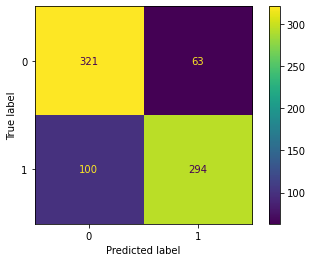

In [580]:
log_reg_cm = confusion_matrix(y_test, predictions, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= log_reg_cm , display_labels=mnb.classes_)
disp.plot()

In [581]:

print(classification_report(y_test, predictions))
print("Accuracy: ", mnb.score(x_testcv, y_test))

[[287  84]
 [ 85 322]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       384
           1       0.82      0.75      0.78       394

    accuracy                           0.79       778
   macro avg       0.79      0.79      0.79       778
weighted avg       0.79      0.79      0.79       778

Accuracy:  0.7904884318766067


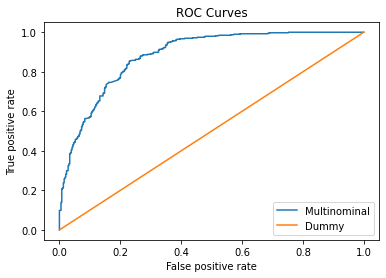

In [582]:
scores = mnb.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#dummy
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(x_train, y_train)
scores = dummy.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['Multinominal', 'Dummy'])
plt.show()

In [583]:
testSentence = ["the earth is flat"]
sentenceTransformed=cv.transform(testSentence)
result = mnb.predict_proba(sentenceTransformed)
print("This tweet has a: ", result[0,1], " chance of being censored.")
print("This tweet has a: ", result[0,0], " chance of being left uncensored.")

This tweet has a:  0.906384976677659  chance of being censored.
This tweet has a:  0.09361502332234138  chance of being left uncensored.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


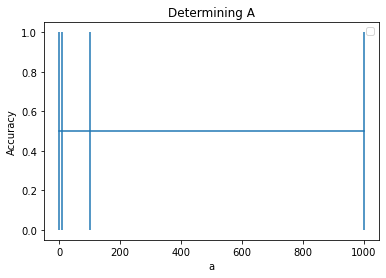

In [584]:
mean_err=[]; std_err=[]
std_err=[]
a_test = [0.001,10,100,1000]

for c in a_test:
    log_reg = MultinomialNB(alpha=a)
    mean_err.append(np.array(scores).mean())
    std_err.append(np.array(scores).std())

plt.errorbar(a_test, mean_err, yerr=std_err)
plt.xlabel('a'); plt.ylabel('Accuracy')

plt.title('Determining A')
plt.legend()
plt.show()